In [25]:
# Auto-reload internal modules
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
from plot_string_count import get_string_count_file_header, parse_sc_data_file
from string_count_utils import get_string_count_from_folder_names, get_average_string_count_from_dict, plot_average_string_count_log_log_from_dict, compute_pq_power_law_on_average, compute_pq_power_law_on_trials
from tqdm import tqdm
from matplotlib import pyplot as plt
import matplotlib as mpl
import re
import pandas as pd
from matplotlib.lines import Line2D
from potential import get_axion_potential_and_minima

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
GREY = (201 / 255, 201 / 255, 201 / 255)
RED = (201 / 255, 0, 0)
GREEN = (0, 201 / 255, 0)
BLUE = (0, 0, 201 / 255)
YELLOW = (201 / 255, 201 / 255, 0)
MAGENTA = (201 / 255, 0, 201 / 255)
CYAN = (0, 201 / 255, 201 / 255)
BROWN = (186 / 255, 116 / 255, 73 / 255)

In [27]:
ca_folder_names = list(glob.glob(f"../build/data/100_trials_ca_N*"))
ca_string_count, ca_time_range = get_string_count_from_folder_names(ca_folder_names, 4)
ca_average_string_count_both = get_average_string_count_from_dict(ca_string_count, True)
ca_average_string_count_indiv = get_average_string_count_from_dict(ca_string_count, False)

100%|██████████| 66/66 [00:34<00:00,  1.91it/s]


In [28]:
ca_average_string_count_both_all = {}

for identifier in ca_string_count:
    ca_average_string_count_both_all[identifier] = ca_string_count[identifier].mean(axis=0)

In [29]:
sa_folder_names = list(glob.glob(f"../build/data/100_trials_sa_N*"))
sa_string_count, sa_time_range = get_string_count_from_folder_names(sa_folder_names, 4)
sa_average_string_count = get_average_string_count_from_dict(sa_string_count, True)

100%|██████████| 7/7 [00:01<00:00,  3.58it/s]


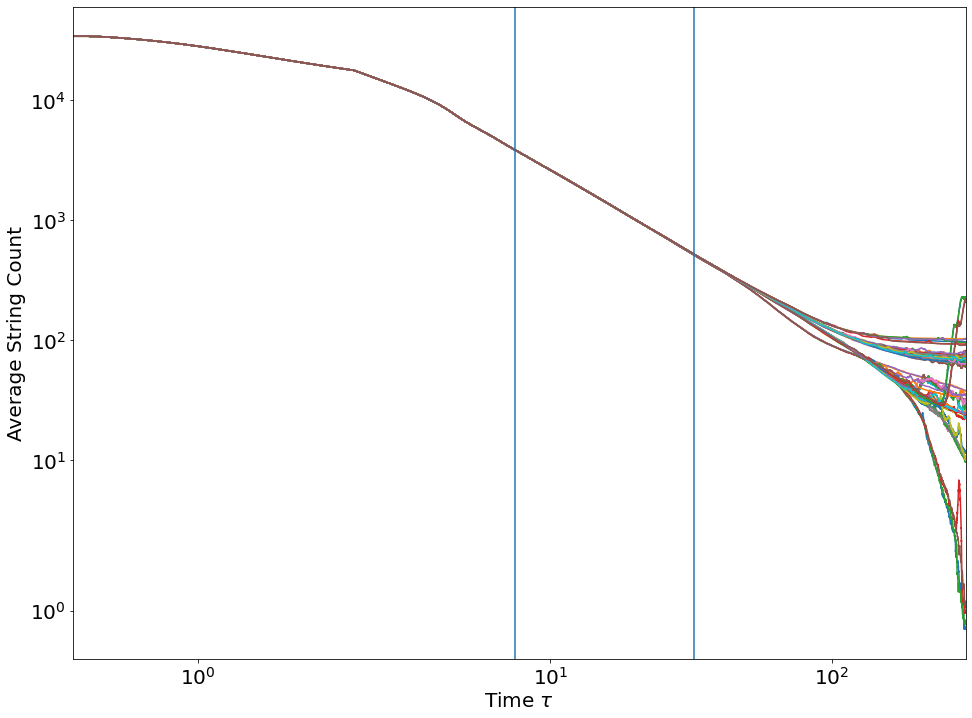

In [30]:
%matplotlib inline
mpl.rc("font", size=20)
fig, ax = plot_average_string_count_log_log_from_dict(ca_average_string_count_both, ca_time_range, 1, 3000)
ax.axvline(7.5)
ax.axvline(32.5)

Companion Axion PQ era power law
PQ power law scale = 63510.45171534105+-12079.051846047027
PQ power law exponent = -1.377112617839183+-0.07294482499596136


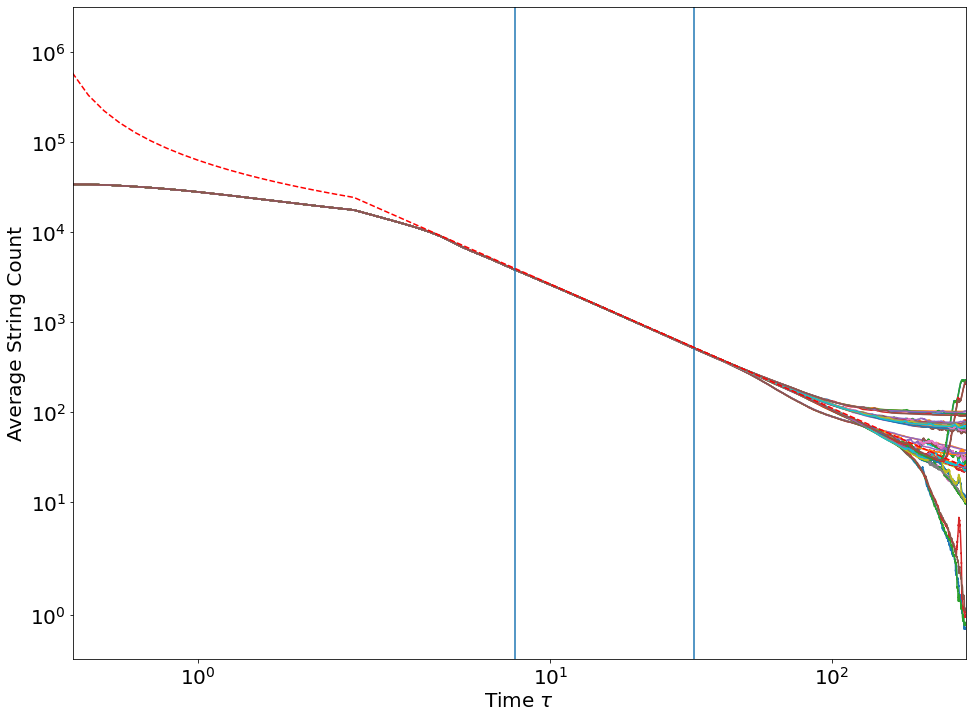

In [31]:
# Computing the PQ power law for companion axion
ca_exponent, ca_exponent_mean, ca_exponent_error, ca_scale, ca_scale_mean, ca_scale_error = compute_pq_power_law_on_trials(ca_string_count, ca_time_range, 75, 325)
print("Companion Axion PQ era power law")
print(f"PQ power law scale = {ca_scale_mean}+-{ca_scale_error}")
print(f"PQ power law exponent = {ca_exponent_mean}+-{ca_exponent_error}")

%matplotlib inline
mpl.rc("font", size=20)
fig, ax = plot_average_string_count_log_log_from_dict(ca_average_string_count_both, ca_time_range, 1, 3000)
ax.axvline(7.5)
ax.axvline(32.5)

ax.plot(ca_time_range, ca_scale_mean * np.power(ca_time_range, ca_exponent_mean), "--r")

Single Axion PQ era power law
PQ power law scale = 64831.0327086428+-11244.315782673615
PQ power law exponent = -1.3857351338083412+-0.06537408073448113


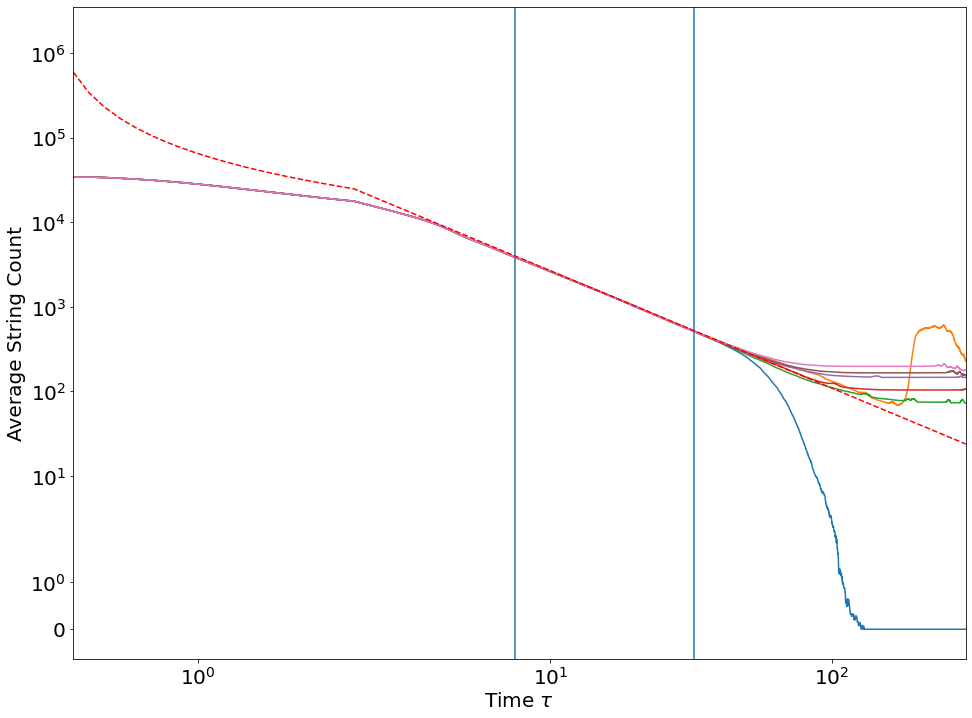

In [32]:
# Computing the PQ power law for single axion
sa_exponent, sa_exponent_mean, sa_exponent_error, sa_scale, sa_scale_mean, sa_scale_error = compute_pq_power_law_on_trials(sa_string_count, sa_time_range, 75, 325)
print("Single Axion PQ era power law")
print(f"PQ power law scale = {sa_scale_mean}+-{sa_scale_error}")
print(f"PQ power law exponent = {sa_exponent_mean}+-{sa_exponent_error}")

%matplotlib inline
mpl.rc("font", size=20)
fig, ax = plot_average_string_count_log_log_from_dict(sa_average_string_count, sa_time_range, 1, 3000)
ax.axvline(7.5)
ax.axvline(32.5)

ax.plot(sa_time_range, sa_scale_mean * np.power(sa_time_range, sa_exponent_mean), "--r")

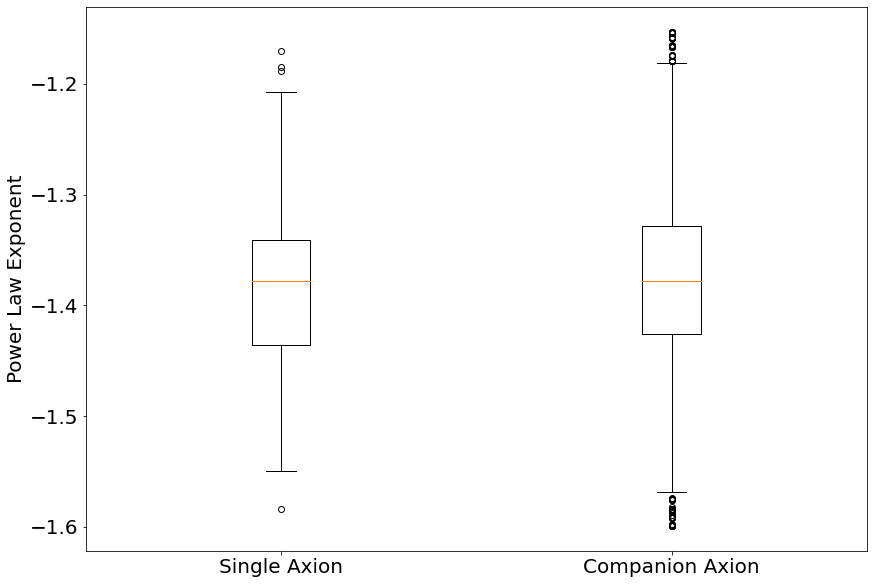

In [33]:
# Comparing the PQ power law exponent between the single and companion axion
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)

ax.boxplot([sa_exponent, ca_exponent])
ax.set_ylabel("Power Law Exponent")
ax.set_xticks([1, 2], ["Single Axion", "Companion Axion"])

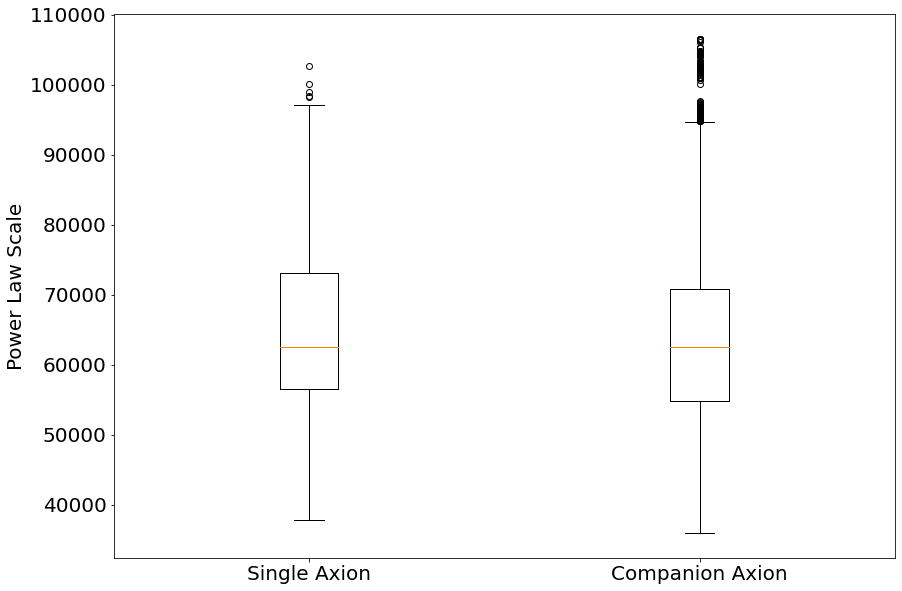

In [34]:
# Comparing the PQ power law scale between the single and companion axion
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)

ax.boxplot([sa_scale, ca_scale])
ax.set_ylabel("Power Law Scale")
ax.set_xticks([1, 2], ["Single Axion", "Companion Axion"])

In [35]:
model_classifications = pd.read_csv("../model_classifications.csv", index_col=0)
minima_colours = [RED, GREEN, BLUE, YELLOW, CYAN, MAGENTA, GREY, BROWN]

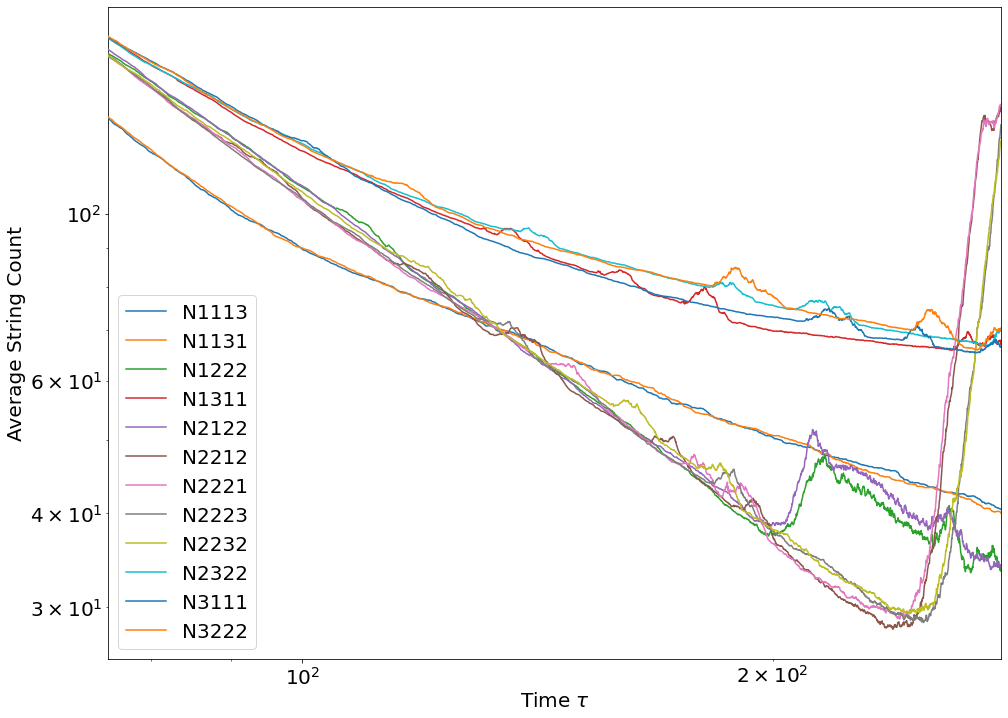

In [58]:
start_timestep = 750
max_timestep = 2800

error_flag = False

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Time $\tau$")
ax.set_ylabel("Average String Count")
ax.set_xlim(ca_time_range[start_timestep], ca_time_range[max_timestep-1])
ax.set_xscale("log")
ax.set_yscale("log")

for identifier in ca_average_string_count_both:
    current_num_minima = model_classifications.loc[identifier]["Number of Minima"]
    if current_num_minima != 2:
        continue
    red, green, blue = minima_colours[current_num_minima-1]
    alpha = 1
    
    current_string_count = ca_average_string_count_both[identifier][start_timestep:max_timestep]
    current_err = np.std(ca_average_string_count_both_all[identifier], axis=0)[start_timestep:max_timestep] / np.sqrt(100)
    
    if error_flag:
        ax.errorbar(
            ca_time_range[start_timestep:max_timestep],
            ca_average_string_count_both[identifier][start_timestep:max_timestep],
            yerr=current_err,
            # c=(red, green, blue, alpha),
            linestyle="-",
            label=identifier,
            zorder=8 - current_num_minima
        )
    else:
        ax.plot(
            ca_time_range[start_timestep:max_timestep],
            ca_average_string_count_both[identifier][start_timestep:max_timestep],
            # c=(red, green, blue, alpha),
            linestyle="-",
            label=identifier,
            zorder=8 - current_num_minima
        )


custom_lines = []
for colour in minima_colours:
    custom_lines.append(Line2D([0], [0], color=colour, lw=4))

ax.legend()
# ax.legend(custom_lines, ["1 Minimum", "2 Minima", "3 Minima", "4 Minima", "5 Minima", "6 Minima", "7 Minima", "8 Minima"])

# fig.savefig("all_models_log_log.png", dpi=100, bbox_inches="tight")

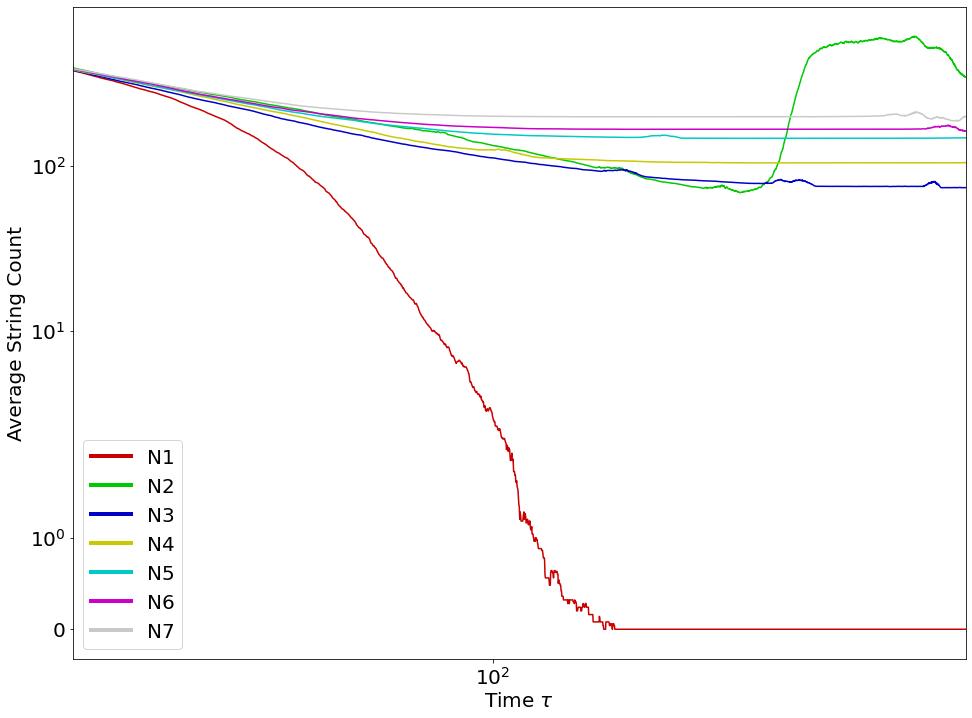

In [37]:
start_timestep = 400
max_timestep = 2800

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Time $\tau$")
ax.set_ylabel("Average String Count")
ax.set_xlim(sa_time_range[start_timestep], sa_time_range[max_timestep-1])
ax.set_xscale("symlog")
ax.set_yscale("symlog")

for identifier in sa_average_string_count:
    red, green, blue = minima_colours[int(identifier[-1])-1]
    alpha = 1
    
    ax.plot(
        sa_time_range[start_timestep:max_timestep],
        sa_average_string_count[identifier][start_timestep:max_timestep],
        c=(red, green, blue, alpha),
        linestyle="-",
        label=identifier,
    )


custom_lines = []
for colour in minima_colours:
    custom_lines.append(Line2D([0], [0], color=colour, lw=4))

ax.legend(custom_lines, ["N1", "N2", "N3", "N4", "N5", "N6", "N7"])

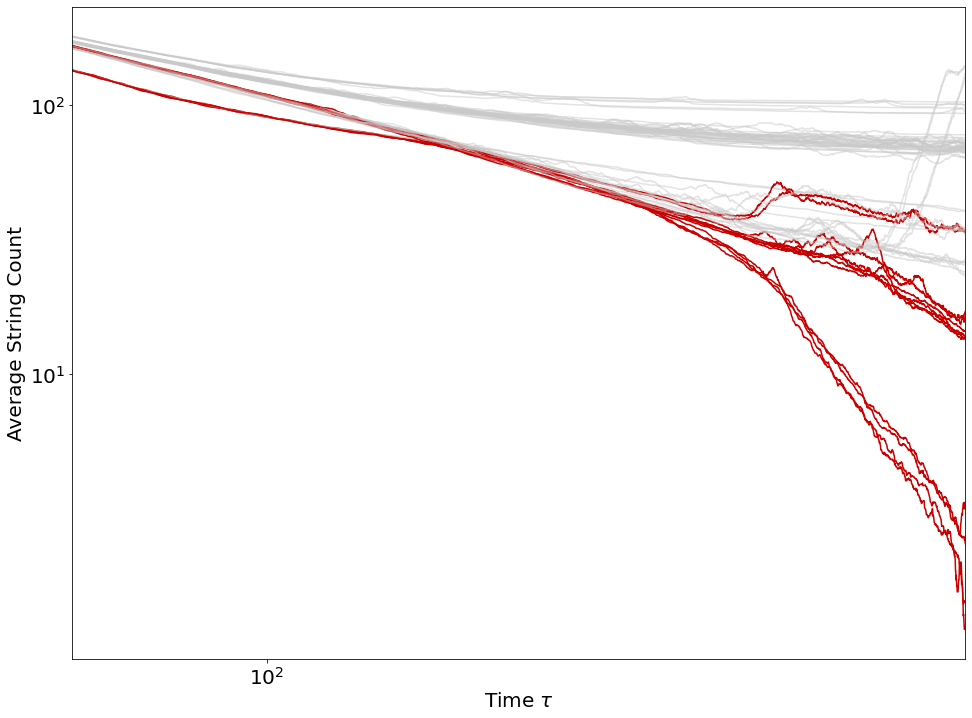

In [38]:
start_timestep = 750
max_timestep = 2800

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Time $\tau$")
ax.set_ylabel("Average String Count")
ax.set_xlim(ca_time_range[start_timestep], ca_time_range[max_timestep-1])
ax.set_xscale("symlog")
ax.set_yscale("symlog")

for identifier in ca_average_string_count_both:
    current_class = model_classifications.loc[identifier]["Classification"]
    if "U" in current_class:
        red, green, blue = RED
        alpha = 1
    else:
        red, green, blue = GREY
        alpha = 0.5
    
    ax.plot(
        ca_time_range[start_timestep:max_timestep],
        ca_average_string_count_both[identifier][start_timestep:max_timestep],
        c=(red, green, blue, alpha),
        linestyle="-",
        label=identifier,
    )


# custom_lines = []
# for colour in minima_colours:
#     custom_lines.append(Line2D([0], [0], color=colour, lw=4))

# ax.legend(custom_lines, ["1 Minimum", "2 Minima", "3 Minima", "4 Minima", "5 Minima", "6 Minima", "7 Minima", "8 Minima"])

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv("../model_classifications.csv")
df

,Model,Classification,Number of Minima
0,N1112,U,1
1,N1113,Sas,2
2,N1121,U,1
3,N1123,U,1
4,N1131,Sa,2
...,...,...,...
61,N3313,Sam,6
62,N3321,Sm,3
63,N3323,Sm',3
64,N3331,Sam,6


In [41]:
header = {r"$N$": [], r"$N'$": [], r"$N_g$": [], r"$N_g'$": [], "Number of Minima": []}

for idx in df.index:
    # Model colour anomalies
    identifier = str(df.loc[idx, "Model"])
    n, n_prime, m, m_prime = identifier[1::]
    n = int(n)
    n_prime = int(n_prime)
    m = int(m)
    m_prime = int(m_prime)
    header[r"$N$"].append(n)
    header[r"$N'$"].append(n_prime)
    header[r"$N_g$"].append(m)
    header[r"$N_g'$"].append(m_prime)
    
    # Number of minima
    num_minima = df.loc[idx, "Number of Minima"]
    header["Number of Minima"].append(num_minima)

# Kappa #

In [42]:
def plot_kappa_plot(model: str, start: int, end: int, save_flag: bool):
    # Decompose into N, N', N_g and N_g'
    n, n_prime, m, m_prime = model[1:]
    kappa_folder_names = list(glob.glob(f"../build/data/spec_100_trials_ca_{model}_*"))
    kappa_string_count_raw, kappa_time_range = get_string_count_from_folder_names(kappa_folder_names, 4)
    kappa_string_count = {}
    kappa_string_count[r"$\kappa = 0.04$"] = ca_string_count[model]
    kappa_string_count[r"$\kappa = 0.4$"] = kappa_string_count_raw["Na_04"]
    kappa_string_count[r"$\kappa = 0.8$"] = kappa_string_count_raw["Na_08"]
    kappa_string_count[r"$\kappa = 1$"] = kappa_string_count_raw["Npa_1"]
    kappa_average_string_count_both = get_average_string_count_from_dict(kappa_string_count, True)
    kappa_average_string_count_indiv = get_average_string_count_from_dict(kappa_string_count, False)

    start_timestep = start
    max_timestep = end

    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    ax.set_xlabel(r"Time $\tau$")
    ax.set_ylabel("Average String Count")
    ax.set_xlim(ca_time_range[start_timestep], ca_time_range[max_timestep-1])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(rf"$N={n}, N'={n_prime}, N_g={m}, N_g'={m_prime}$")

    kappa_colours = [RED, GREEN, BLUE, YELLOW]

    for idx, identifier in enumerate(kappa_average_string_count_both):
        current_num_minima = model_classifications.loc[model]["Number of Minima"]
        red, green, blue = kappa_colours[idx]
        alpha = 1

        current_string_count = kappa_average_string_count_both[identifier][start_timestep:max_timestep]

        ax.plot(
            ca_time_range[start_timestep:max_timestep],
            kappa_average_string_count_both[identifier][start_timestep:max_timestep],
            c=(red, green, blue, alpha),
            linestyle="-",
            label=identifier,
            zorder=8 - current_num_minima
        )


    custom_lines = []
    for colour in minima_colours:
        custom_lines.append(Line2D([0], [0], color=colour, lw=4))

    ax.legend(custom_lines, kappa_average_string_count_both.keys())

    if save_flag:
        fig.savefig(f"{model}_kappa_plot.png", dpi=100, bbox_inches="tight")

In [43]:
# plot_kappa_plot("N2311", 750, 2800, False)
# plot_kappa_plot("N1112", 750, 2800, False)
# plot_kappa_plot("N1221", 750, 2800, False)

In [49]:
def plot_string_count_and_potential(model: str, start: int, end: int, save_flag: bool):
    # Decompose into N, N', N_g and N_g'
    n, n_prime, m, m_prime = model[1:]
    n = int(n)
    n_prime = int(n_prime)
    m = int(m)
    m_prime = int(m_prime)

    fig = plt.figure(figsize=(16, 6))
    fig.suptitle(rf"$N={n}, N'={n_prime}, N_g={m}, N_g'={m_prime}$")
    string_count_ax = fig.add_subplot(121)
    potential_ax = fig.add_subplot(122)

    start_timestep = start
    max_timestep = end

    string_count_ax.plot(ca_time_range[start_timestep:max_timestep], ca_average_string_count_both[model][start_timestep:max_timestep], c=(*RED, alpha),
            linestyle="-",
            label=identifier,
            zorder=8 - current_num_minima)
    string_count_ax.set_xscale("log")
    string_count_ax.set_yscale("log")
    string_count_ax.set_xlabel(r"Conformal time $\tau$")
    string_count_ax.set_ylabel(r"Average string count")
    string_count_ax.set_xlim(ca_time_range[start_timestep], ca_time_range[max_timestep-1])

    (
        potential,
        min_indices,
        phi_phase_range,
        psi_phase_range,
    ) = get_axion_potential_and_minima(n, n_prime, m, m_prime, 0.025, 0.04, 2000)

    # Plot the axion potential
    potential_map = potential_ax.contourf(
        phi_phase_range, psi_phase_range, potential, levels=15
    )

    # Plot the minima points
    for (min_x, min_y) in min_indices:
        potential_ax.scatter(
            phi_phase_range[min_x, min_y], psi_phase_range[min_x, min_y], 100, "r"
        )

    # Formatting
    potential_ax.axis("scaled")
    potential_ax.set_xlabel(r"$\theta$")
    potential_ax.set_ylabel(r"$\theta'$")
    _ = fig.colorbar(potential_map, ax=potential_ax, fraction=0.046, pad=0.04, label=r"$V(\phi, \psi)$")

    if save_flag:
        fig.savefig(f"{model}_string_count_potential.png", dpi=100, bbox_inches="tight")

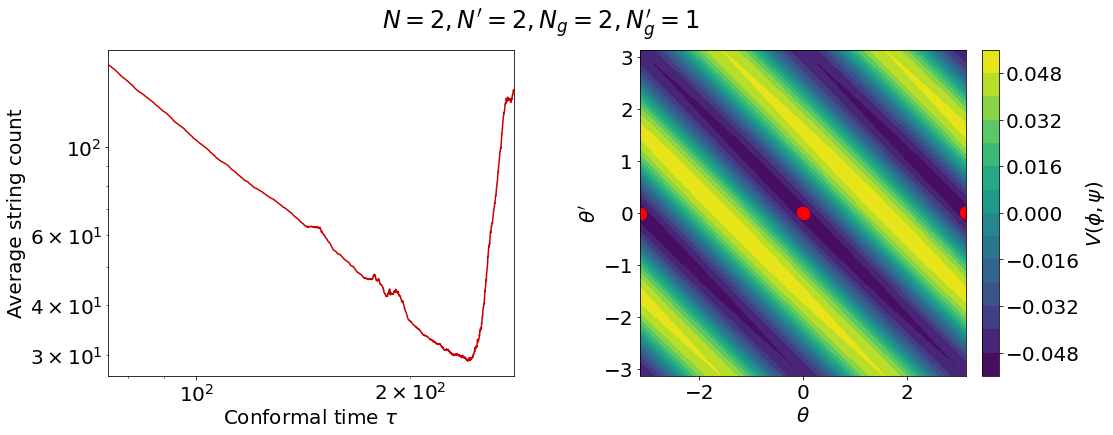

In [59]:
# plot_string_count_and_potential("N2311", 750, 2800, False)
# plot_string_count_and_potential("N1112", 750, 2800, False)
# plot_string_count_and_potential("N1221", 750, 2800, False)
plot_string_count_and_potential("N2221", 750, 2800, False)

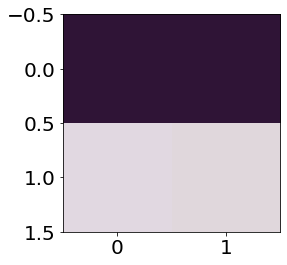

In [61]:
arr = np.array([
    [np.pi + 0.1, np.pi],
    [0, 0.1]
])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(arr, vmin=-np.pi, vmax=+np.pi, cmap="twilight_shifted")